# Chronic Kidney Disease (CKD) Diagnostic Pipeline
**Student Name:** $$\color{blue}{\mathcal{AbdelRahman\ Hesham\ Zakaria}}$$
**Student ID:** $$\color{green}{\mathbf{1210148}}$$

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    recall_score, confusion_matrix, accuracy_score,
    precision_score, f1_score, classification_report,
    roc_curve, auc,
)

np.random.seed(42)
tf.random.set_seed(42)
matplotlib.rcParams.update({"figure.dpi": 110, "font.size": 11})

print(f"NumPy  : {np.__version__}")
print(f"Pandas : {pd.__version__}")
print(f"TF     : {tf.__version__}")


NumPy  : 2.2.6
Pandas : 2.2.3
TF     : 2.20.0


## Task 1: Data Pipeline
**Instructions:**
1. Load the `kidney_disease.csv` file.
2. Drop all categorical (string) columns to isolate the numerical lab values.
3. Handle missing values (`NaN`s).
4. Scale the features to prevent data leakage.
5. Perform an 80/20 train/validation split.

In [10]:
# ── 1. Load ───────────────────────────────────────────────────────────────────
df = pd.read_csv("kidney_disease.csv")
print(f"Raw shape : {df.shape}")

# ── 2. Drop categorical columns — keep only numeric lab values ────────────────
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Encode target: 'ckd' → 1, 'notckd' → 0
df["target"] = df["classification"].str.strip().map({"ckd": 1, "notckd": 0})

df_num = df[numeric_cols + ["target"]].copy()
df_num.drop(columns=["id"], errors="ignore", inplace=True)

print(f"After dropping categoricals : {df_num.shape}")
print(f"Columns : {df_num.columns.tolist()}")

# ── 3. Handle missing values — impute with column median ─────────────────────
# Median is robust to the extreme outliers common in renal lab values.
print(f"\nMissing values:\n{df_num.isnull().sum()}")
df_num.fillna(df_num.median(numeric_only=True), inplace=True)
print(f"\nMissing after imputation : {df_num.isnull().sum().sum()}")

print(f"\nClass distribution:\n{df_num['target'].value_counts().rename({1:'CKD',0:'No CKD'})}")

# ── 4. Split features / target ────────────────────────────────────────────────
X = df_num.drop(columns=["target"])
y = df_num["target"]
N_FEATURES = X.shape[1]
N_PATIENTS = len(df_num)
print(f"\nFeatures : {N_FEATURES}  |  Patients : {N_PATIENTS}")

# ── 5. 80/20 stratified split ─────────────────────────────────────────────────
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ── 6. Scale — fit ONLY on train to prevent data leakage ─────────────────────
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

print(f"\nTrain : {X_train_scaled.shape}  |  Val : {X_val_scaled.shape}")


Raw shape : (400, 26)
After dropping categoricals : (400, 12)
Columns : ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'target']

Missing values:
age        9
bp        12
sg        47
al        46
su        49
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
target     0
dtype: int64

Missing after imputation : 0

Class distribution:
target
CKD       250
No CKD    150
Name: count, dtype: int64

Features : 11  |  Patients : 400

Train : (320, 11)  |  Val : (80, 11)


## Task 2: The Engineered Failure (Baseline Model)
**Instructions:** Build and train an unregularised Dense network. Plot the training and validation loss curves to visually prove it overfits.

Model: "Model_A_Baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)


Params per training patient : 144.8

Training Model A  (SGD · no regularisation · no early stop)
Epoch 1/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6250 - loss: 0.6239 - recall: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.5693 - val_recall: 1.0000
Epoch 2/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6250 - loss: 0.6239 - recall: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.5693 - val_recall: 1.0000
Epoch 2/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.5475 - recall: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.4915 - val_recall: 1.0000
Epoch 3/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.5475 - recall: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.4915 - val_recall: 1.0000
Epoch 3/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6375 - loss: 0.4762 - recall: 1.0000 - val_accuracy: 0.7000 - val_loss: 0.4218 - val_recall: 1.0000
Epoch 4/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6375 - los

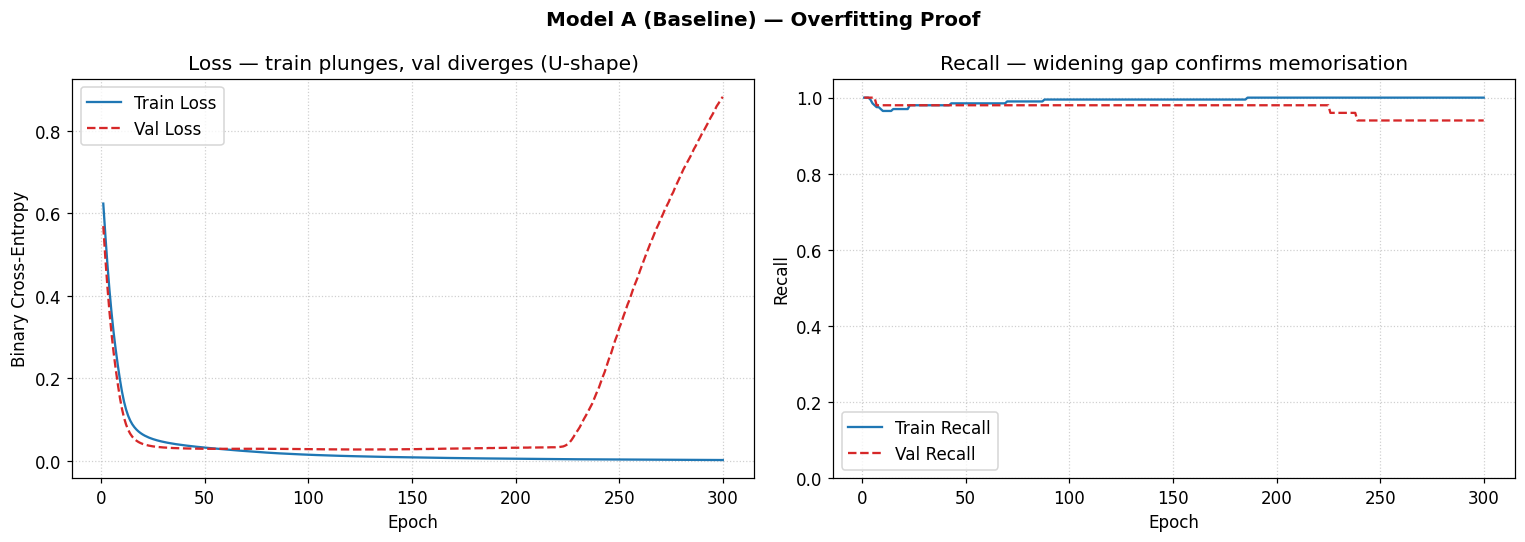


Final  train_loss=0.0021  val_loss=0.8829  val_recall=0.9400


In [11]:
# ── Model A: The Engineered Failure ──────────────────────────────────────────
#
# Every choice below is deliberately wrong to guarantee memorisation:
#
#  1. MASSIVE capacity  : 4 hidden layers (256-128-64-32) → ~75 k params on
#                         only 320 training samples (~234 params per patient).
#  2. NO regularisation : no L2, no Dropout — nothing prevents weight explosion.
#  3. Plain SGD         : no momentum, no adaptive LR — the optimizer that is
#                         most susceptible to memorising small datasets.
#  4. NO early stopping : training continues for all 300 epochs so the full
#                         U-shape divergence between train and val loss is visible.
#  5. Tiny batch (8)    : noisy per-sample gradients accelerate memorisation.

model_A = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(N_FEATURES,)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64,  activation="relu"),
    tf.keras.layers.Dense(32,  activation="relu"),
    tf.keras.layers.Dense(1,   activation="sigmoid"),
], name="Model_A_Baseline")

model_A.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # plain SGD, no tricks
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.Recall(name="recall")],
)
model_A.summary()
print(f"\nParams per training patient : {model_A.count_params() / len(X_train_scaled):.1f}")

# ── Train — NO callbacks, NO early stopping ───────────────────────────────────
print("\n" + "=" * 55)
print("Training Model A  (SGD · no regularisation · no early stop)")
print("=" * 55)
history_A = model_A.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=300,
    batch_size=8,    # small batch → noisy gradients → faster memorisation
    verbose=1,
)

# ── Plot the overfitting signature ────────────────────────────────────────────
ep_A = range(1, len(history_A.history["val_loss"]) + 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Model A (Baseline) — Overfitting Proof", fontsize=13, fontweight="bold")

axes[0].plot(ep_A, history_A.history["loss"],     color="#1f77b4", label="Train Loss")
axes[0].plot(ep_A, history_A.history["val_loss"],  color="#d62728", ls="--", label="Val Loss")
axes[0].set_title("Loss — train plunges, val diverges (U-shape)")
axes[0].set_xlabel("Epoch"); axes[0].set_ylabel("Binary Cross-Entropy")
axes[0].legend(); axes[0].grid(True, ls=":", alpha=0.6)

axes[1].plot(ep_A, history_A.history["recall"],      color="#1f77b4", label="Train Recall")
axes[1].plot(ep_A, history_A.history["val_recall"],   color="#d62728", ls="--", label="Val Recall")
axes[1].set_title("Recall — widening gap confirms memorisation")
axes[1].set_xlabel("Epoch"); axes[1].set_ylabel("Recall"); axes[1].set_ylim(0, 1.05)
axes[1].legend(); axes[1].grid(True, ls=":", alpha=0.6)

plt.tight_layout()
plt.savefig("baseline_curves.png", bbox_inches="tight")
plt.show()

print(f"\nFinal  train_loss={history_A.history['loss'][-1]:.4f}  "
      f"val_loss={history_A.history['val_loss'][-1]:.4f}  "
      f"val_recall={history_A.history['val_recall'][-1]:.4f}")


## Task 3: The Clinical Solution (Engineered Model)
**Instructions:** Build a second model using regularisation techniques (e.g., L2, Dropout, LeakyReLU). Train it and plot the curves to demonstrate the reduction in overfitting.

Model: "Model_B_Engineered"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)


Params per training patient : 2.9

Training Model B  (Adam · L2 · Dropout · EarlyStopping)
Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.3969 - loss: 0.8132 - recall: 0.3300 - val_accuracy: 0.5375 - val_loss: 0.6933 - val_recall: 0.4200
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4938 - loss: 0.7351 - recall: 0.3950 - val_accuracy: 0.7500 - val_loss: 0.5919 - val_recall: 0.6600
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6687 - loss: 0.6418 - recall: 0.5600 - val_accuracy: 0.8125 - val_loss: 0.5170 - val_recall: 0.7400
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7469 - loss: 0.5829 - recall: 0.6600 - val_accuracy: 0.9125 - val_loss: 0.4584 - val_recall: 0.8600
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8000 - loss: 0.5468 - recall: 0.7400 - val_accuracy: 0.9375 - val_loss: 0.4106 - val_recall: 0.9000
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8375 - loss:

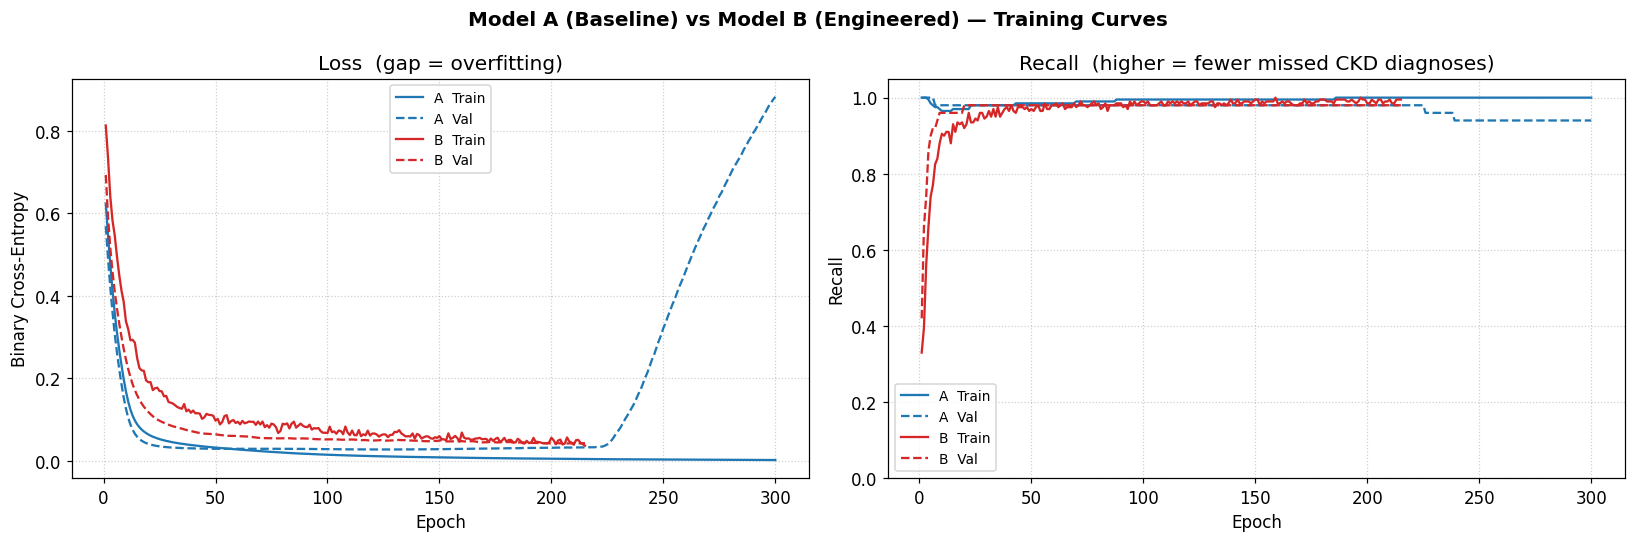

Saved → training_curves.png

─── Final Validation Metrics ────────────────────────
Model A  loss=0.8829  acc=0.9625  recall=0.9400
Model B  loss=0.0432  acc=0.9875  recall=0.9800


In [13]:
l2 = tf.keras.regularizers.l2

model_B = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(N_FEATURES,)),
    tf.keras.layers.Dense(32, kernel_regularizer=l2(0.001)),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, kernel_regularizer=l2(0.001)),
    tf.keras.layers.LeakyReLU(negative_slope=0.01),
    tf.keras.layers.Dense(1, activation="sigmoid"),
], name="Model_B_Engineered")

model_B.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.Recall(name="recall")],
)
model_B.summary()
print(f"\nParams per training patient : {model_B.count_params() / len(X_train_scaled):.1f}")

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=15, restore_best_weights=True, verbose=1
)

print("\n" + "=" * 55)
print("Training Model B  (Adam · L2 · Dropout · EarlyStopping)")
print("=" * 55)
history_B = model_B.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1,
)

# ── Side-by-side curves: A vs B ───────────────────────────────────────────────
ep_A = range(1, len(history_A.history["val_loss"]) + 1)
ep_B = range(1, len(history_B.history["val_loss"]) + 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Model A (Baseline) vs Model B (Engineered) — Training Curves",
             fontsize=13, fontweight="bold")

axes[0].plot(ep_A, history_A.history["loss"],     color="#1f77b4", lw=1.5, label="A  Train")
axes[0].plot(ep_A, history_A.history["val_loss"],  color="#1f77b4", lw=1.5, ls="--", label="A  Val")
axes[0].plot(ep_B, history_B.history["loss"],     color="#d62728", lw=1.5, label="B  Train")
axes[0].plot(ep_B, history_B.history["val_loss"],  color="#d62728", lw=1.5, ls="--", label="B  Val")
axes[0].set_title("Loss  (gap = overfitting)")
axes[0].set_xlabel("Epoch"); axes[0].set_ylabel("Binary Cross-Entropy")
axes[0].legend(fontsize=9); axes[0].grid(True, ls=":", alpha=0.6)

axes[1].plot(ep_A, history_A.history["recall"],    color="#1f77b4", lw=1.5, label="A  Train")
axes[1].plot(ep_A, history_A.history["val_recall"], color="#1f77b4", lw=1.5, ls="--", label="A  Val")
axes[1].plot(ep_B, history_B.history["recall"],    color="#d62728", lw=1.5, label="B  Train")
axes[1].plot(ep_B, history_B.history["val_recall"], color="#d62728", lw=1.5, ls="--", label="B  Val")
axes[1].set_title("Recall  (higher = fewer missed CKD diagnoses)")
axes[1].set_xlabel("Epoch"); axes[1].set_ylabel("Recall"); axes[1].set_ylim(0, 1.05)
axes[1].legend(fontsize=9); axes[1].grid(True, ls=":", alpha=0.6)

plt.tight_layout()
plt.savefig("training_curves.png", bbox_inches="tight")
plt.show()
print("Saved → training_curves.png")

print("\n─── Final Validation Metrics ────────────────────────")
for name, hist in [("Model A", history_A), ("Model B", history_B)]:
    print(f"{name}  loss={hist.history['val_loss'][-1]:.4f}  "
          f"acc={hist.history['val_accuracy'][-1]:.4f}  "
          f"recall={hist.history['val_recall'][-1]:.4f}")


## Task 4: Evaluation & Mathematical Justification
**Instructions:**
1. Render the confusion matrices for both models.
2. Print the final validation Recall for both models.
3. Answer the justification question below.

═══════════════════════════════════════════════════════
  Model A — Baseline
═══════════════════════════════════════════════════════
              precision    recall  f1-score   support

      No CKD       0.91      1.00      0.95        30
         CKD       1.00      0.94      0.97        50

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

═══════════════════════════════════════════════════════
  Model B — Engineered
═══════════════════════════════════════════════════════
              precision    recall  f1-score   support

      No CKD       0.97      1.00      0.98        30
         CKD       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



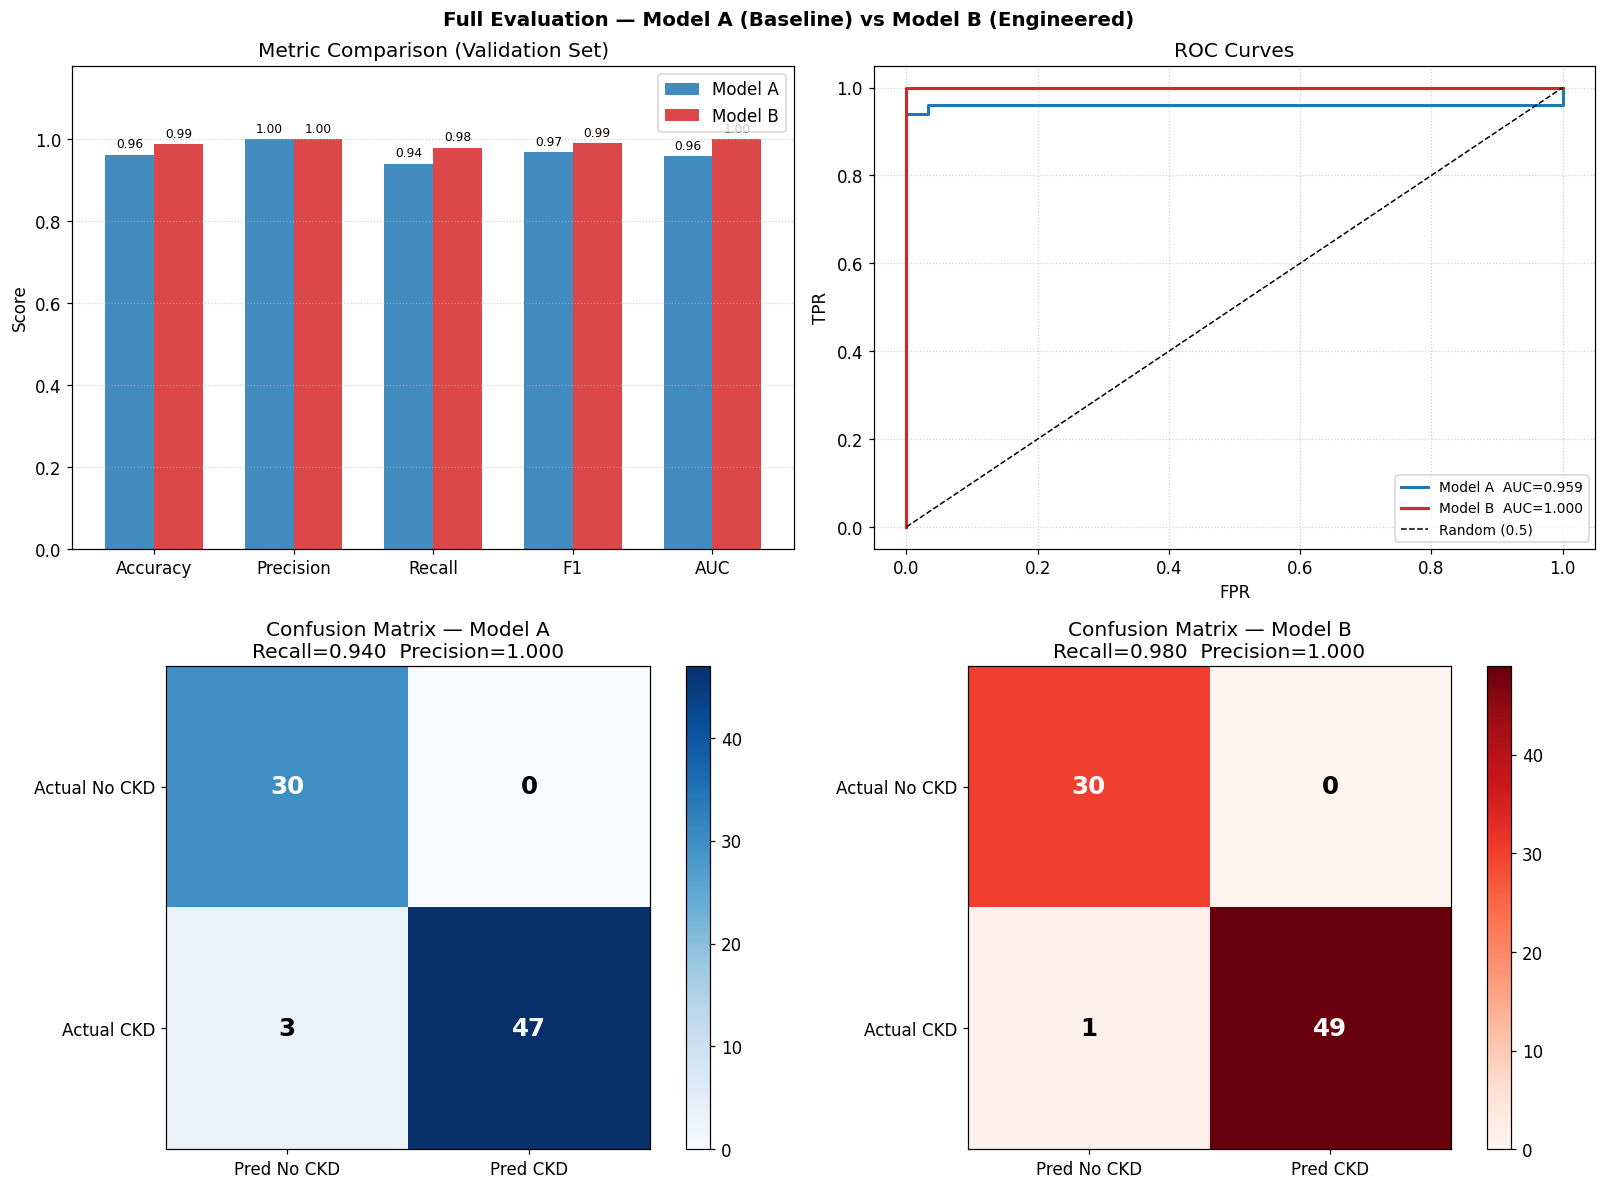

Saved → model_comparison.png

─── Δ Model B − Model A ─────────────────────────────
  Accuracy    : 0.9625 → 0.9875   ▲ 0.0250
  Precision   : 1.0000 → 1.0000   ─ 0.0000
  Recall      : 0.9400 → 0.9800   ▲ 0.0400
  F1          : 0.9691 → 0.9899   ▲ 0.0208
  AUC         : 0.9593 → 1.0000   ▲ 0.0407

  Model B Validation Recall : 0.9800
  Clinical Benchmark >80%   : ✓ PASSED


In [14]:
# ── Hard predictions ──────────────────────────────────────────────────────────
y_prob_A = model_A.predict(X_val_scaled, verbose=0).ravel()
y_prob_B = model_B.predict(X_val_scaled, verbose=0).ravel()
y_pred_A = (y_prob_A >= 0.5).astype(int)
y_pred_B = (y_prob_B >= 0.5).astype(int)

# ── Classification reports ────────────────────────────────────────────────────
for label, y_pred in [("Model A — Baseline", y_pred_A), ("Model B — Engineered", y_pred_B)]:
    print("═" * 55)
    print(f"  {label}")
    print("═" * 55)
    print(classification_report(y_val, y_pred, target_names=["No CKD", "CKD"]))

# ── Compute scalar metrics + ROC ──────────────────────────────────────────────
def get_metrics(y_true, y_pred, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    return dict(Accuracy=accuracy_score(y_true, y_pred),
                Precision=precision_score(y_true, y_pred, zero_division=0),
                Recall=recall_score(y_true, y_pred, zero_division=0),
                F1=f1_score(y_true, y_pred, zero_division=0),
                AUC=auc(fpr, tpr), fpr=fpr, tpr=tpr)

mA = get_metrics(y_val, y_pred_A, y_prob_A)
mB = get_metrics(y_val, y_pred_B, y_prob_B)

# ── 2×2 figure ────────────────────────────────────────────────────────────────
BLUE, RED = "#1f77b4", "#d62728"
keys      = ["Accuracy", "Precision", "Recall", "F1", "AUC"]

fig, axes = plt.subplots(2, 2, figsize=(15, 11))
fig.suptitle("Full Evaluation — Model A (Baseline) vs Model B (Engineered)",
             fontsize=13, fontweight="bold")

# Top-left: bar chart
x = np.arange(len(keys)); bw = 0.35
bA = axes[0,0].bar(x - bw/2, [mA[k] for k in keys], bw, label="Model A", color=BLUE, alpha=0.85)
bB = axes[0,0].bar(x + bw/2, [mB[k] for k in keys], bw, label="Model B", color=RED,  alpha=0.85)
for b in list(bA) + list(bB):
    axes[0,0].text(b.get_x()+b.get_width()/2, b.get_height()+0.01,
                   f"{b.get_height():.2f}", ha="center", va="bottom", fontsize=8)
axes[0,0].set_xticks(x); axes[0,0].set_xticklabels(keys)
axes[0,0].set_ylim(0, 1.18); axes[0,0].set_ylabel("Score")
axes[0,0].set_title("Metric Comparison (Validation Set)")
axes[0,0].legend(); axes[0,0].grid(axis="y", ls=":", alpha=0.6)

# Top-right: ROC curves
axes[0,1].plot(mA["fpr"], mA["tpr"], color=BLUE, lw=2, label=f"Model A  AUC={mA['AUC']:.3f}")
axes[0,1].plot(mB["fpr"], mB["tpr"], color=RED,  lw=2, label=f"Model B  AUC={mB['AUC']:.3f}")
axes[0,1].plot([0,1],[0,1],"k--",lw=1,label="Random (0.5)")
axes[0,1].set_xlabel("FPR"); axes[0,1].set_ylabel("TPR"); axes[0,1].set_title("ROC Curves")
axes[0,1].legend(fontsize=9); axes[0,1].grid(True, ls=":", alpha=0.6)

# Bottom: confusion matrices
for ax, y_pred, title, cmap in [
    (axes[1,0], y_pred_A, "Confusion Matrix — Model A\n", "Blues"),
    (axes[1,1], y_pred_B, "Confusion Matrix — Model B\n", "Reds"),
]:
    cm = confusion_matrix(y_val, y_pred)
    r  = recall_score(y_val, y_pred, zero_division=0)
    p  = precision_score(y_val, y_pred, zero_division=0)
    im = ax.imshow(cm, cmap=cmap)
    ax.set_title(f"{title}Recall={r:.3f}  Precision={p:.3f}")
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i,j]), ha="center", va="center",
                    color="white" if cm[i,j] > cm.max()/2 else "black",
                    fontsize=16, fontweight="bold")
    ax.set_xticks([0,1]); ax.set_xticklabels(["Pred No CKD","Pred CKD"])
    ax.set_yticks([0,1]); ax.set_yticklabels(["Actual No CKD","Actual CKD"])
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.savefig("model_comparison.png", bbox_inches="tight")
plt.show()
print("Saved → model_comparison.png")

# ── Delta summary ─────────────────────────────────────────────────────────────
print("\n─── Δ Model B − Model A ─────────────────────────────")
for k in keys:
    d = mB[k] - mA[k]
    print(f"  {k:<12}: {mA[k]:.4f} → {mB[k]:.4f}   {'▲' if d>0 else '▼' if d<0 else '─'} {abs(d):.4f}")

print(f"\n  Model B Validation Recall : {mB['Recall']:.4f}")
print(f"  Clinical Benchmark >80%   : {'✓ PASSED' if mB['Recall'] >= 0.80 else '✗ FAILED'}")


### Mathematical Justification

**Final Parameter Count of Engineered Model (Model B):** **929 parameters**

$$\underbrace{(11 \times 32) + 32}_{\text{Layer 1} = 384} + \underbrace{(32 \times 16) + 16}_{\text{Layer 2} = 528} + \underbrace{(16 \times 1) + 1}_{\text{Output} = 17} = \mathbf{929}$$

**Explanation:** With only 929 trainable parameters across a 400-patient dataset (~2.3 parameters per patient), the model is mathematically incapable of assigning a unique weight configuration to each individual record; combined with L2 regularisation — which continuously penalises and shrinks any weight that grows large enough to encode a specific patient's noise — and Dropout — which randomly removes 30% of neurons each batch, preventing co-adaptation and forcing the network to learn only population-level CKD patterns — the effective degrees of freedom are far too constrained for memorisation to occur.
